<a href="https://colab.research.google.com/github/jyothign0/Deep-Learning/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.float32)
  img=img[tf.newaxis,:]
  return img

In [21]:
content_image=load_image('/content/dali.jpg')
style_image=load_image('/content/monet.jpg')

In [22]:
content_image.shape

TensorShape([1, 191, 264, 3])

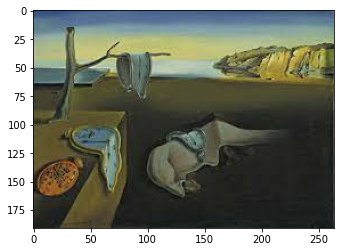

In [23]:
plt.imshow(np.squeeze(content_image))

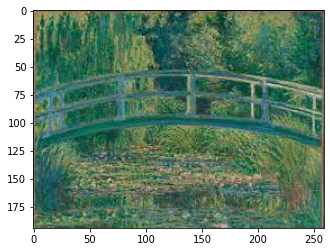

In [24]:
plt.imshow(np.squeeze(style_image))

In [25]:
stylized_image=model(content_image,style_image)[0]

In [26]:
stylized_image.shape

TensorShape([1, 192, 264, 3])

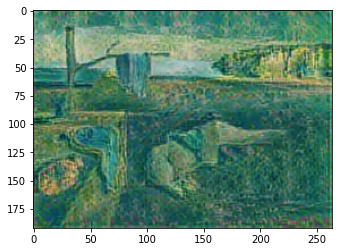

In [27]:
plt.imshow(np.squeeze(stylized_image))

In [28]:
#save the image
cv2.imwrite('generated_image.jpg',cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BGR2RGB))


True